<center>
    <h1 id='demographic-filtering' style='color:#7159c1; font-size:350%'>Demographic Filtering</h1>
    <i style='font-size:125%'>The simplest Recommender Algorithm</i>
</center>

> **Topics**

```
- ✨ Demographic Filtering
- ✨ Bayesian Mean
- ✨ Popularity
```

In [1]:
# ---- Imports ----
import matplotlib.pyplot as plt             # pip install matplotlib
import mplcyberpunk                         # pip install mplcyberpunk
import numpy as np                          # pip install numpy
import pandas as pd                         # pip install pandas
import seaborn as sns                       # pip install seaborn

# ---- Constants ----
DATASETS_PATH = ('./datasets')
NUMBER_OF_RECOMMENDATIONS = (10)
SEED = (20240420)                           # April 20, 2024 (fourth Bitcoin Halving)

# ---- Settings ----
np.random.seed(SEED)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')
plt.style.use('cyberpunk')

# ---- Functions ----
def plot_top_n_animes(df, plot_title, x_axis, y_axis, limit):
    """
    \ Description:
        - plots a horizontal bar plot of the recommended animes;
        - the x-axis corresponds to the mean score;
        - the y-axis corresponds to the anime title;
        - x-axis is limited by 'limit' parameter.
    
    \ Parameters:    
        - df: Pandas DataFrame;
        - plot_title: string;
        - x_axis: string (must be a present column in 'df' parameter);
        - y_axis: string (must be a present column in 'df' parameter);
        - limit: integer.
    """
    plt.title(plot_title)
    plt.xlim(right=limit)
    sns.barplot(data=df, x=x_axis, y=y_axis, palette='Purples')
    for index, score in enumerate(df[x_axis]): plt.text(9.50, index + 0.09, '%.2f' % score)
    plt.show()

<h1 id='0-demographic-filtering' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Demographic Filtering</h1>

`Demographic Filtering` recommends animes that are popular between the users, that is, the animes with higher Bayesian or Arithmetic Mean Score and Popularity Rank. If you use Netflix, you probably already stumbled upon to some series marked as `Hot` or `Everyone is watching`. If that's so, congrats, that is a real-world Demographic Filtering Recommendation!! To make things even clearer, assume that Bleach, Oregairu and Jujutsu Kaisen are the animes with higher scores on a stream platform and it uses Demographic Filtering to recommend the animes. Guess what? The platform will recommend these very animes to all users!!

About the advantages:

> **Less Data Required** - `since it uses the Mean Score for recommendation, only animes data is required`;

> **Less Computational Time and Cost** - `consequently, the model training takes less time and cost to compute`;

> **Simple Evaluation Metrics** - `the metrics used for evaluation (Bayesian Mean Score, Arithmetic Mean Score and Popularity Rank) are not complicated to understand and to apply`.

<br />

Disadvantages-wise:

> **Poor Recommendations** - `bad recommendations are made since this technique generalizes the taste of all users to only one: The animes with higher Score or Popularity`.

<br />

The image below ilustrates how this technique works:

<br />

<figure style='text-align:center'>
    <img style='border-radius:20px' src='./assets/0-demographic-filtering.png' alt='Demographic Filtering Diagram' />
    <figcaption>Figure 1 - Demographic Filtering Diagram. By <a href='https://www.width.ai/post/recommender-systems-recommendation-systems'>Matt Payne - Recommender Systems For Business - A Gentle Introduction©</a>.</figcaption>
</figure>

<h1 id='1-bayesian-mean' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Bayesian Mean</h1>

`Bayesian Mean`'s idea is simple, first we have to find the number of ratings of the item, the Arithmetic Mean of the item, the minimum number of ratings that an item must have to be considered in the system and the Arithmetic Mean across all items. After that, we apply them in the following equation:

```python
bayeasian_mean = ((v / (v + m)) * A) + ((m / (v + m)) * C)
```

$$
Bayesian Mean = \frac{v}{v + m} \cdot A + \frac{m}{v + m} \cdot C
$$

where:

- v: number of the item's ratings;
- m: minimum number of ratings that an item must have to be considered in the system;
- A: item's Arithmetic Man;
- C: Arithmetic Mean across all items.

being:

- first part of the equation: the weight for the item's Arithmetic Mean;
- second part of the equation: the weight for the system's Arithmetic Mean.

<br /><br />

The equation can also be used in its alternative form, resulting in the same result:

```python
bayesian_mean = ((c * m) + (n * r)) / (c + n)
```

$$
Bayesian Mean = \frac{(c \cdot m) + (n \cdot r)}{(c + n)}
$$

where:

- c: minimum number of ratings that an item must have to be considered in the system;
- m: Arithmetic Mean across all items;
- n: number of the item's ratings;
- r: item's Arithmetic Mean.

<br />

Some observations about this metric:

- for an item with a fewer than average number of ratings - the score should be around the system’s Arithmetic Mean;
- for an item with a substantial number of ratings - the score should be the item’s Arithmetic Mean;
- as the number of ratings that an item receives increases, the score should gradually move from system’s Mean to item’s Mean.

<br />

Since MyAnimeList uses Bayesian/Weighted Mean to calculate the animes' score, we just have to sort the animes by score value in descending order!!

You can check out for more details about how the score is calculated at ["How are MyAnimeList scores calculated?"](https://myanimelist.net/info.php?go=topanime);

In [2]:
# ---- Reading Dataset ----
animes_df = pd.read_csv(f'{DATASETS_PATH}/anime-transformed-dataset-2023.csv', index_col='id')
animes_df = animes_df.loc[animes_df.score > 0][['title', 'genres', 'score', 'scored_by', 'popularity', 'image_url']]

In [3]:
# ---- Top Animes: Bayesian Mean - Table ----
bayesian_mean_top_n_animes = animes_df.sort_values(by='score', ascending=False).head(NUMBER_OF_RECOMMENDATIONS)
bayesian_mean_top_n_animes

,title,genres,score,scored_by,popularity,image_url
id,,,,,,
5114,fullmetal alchemist brotherhood,"adventure, action, fantasy, drama",9.10,2020030,3,https://cdn.myanimelist.net/images/anime/1208/94745.jpg
41467,bleach sennen kessen-hen,"adventure, action, fantasy",9.07,213872,464,https://cdn.myanimelist.net/images/anime/1908/135431.jpg
9253,steins gate,"sci-fi, suspense, drama",9.07,1336233,13,https://cdn.myanimelist.net/images/anime/1935/127974.jpg
28977,gintama 2,"action, sci-fi, comedy",9.06,237957,331,https://cdn.myanimelist.net/images/anime/3/72078.jpg
38524,shingeki no kyojin season 3 part 2,"action, drama",9.05,1471825,24,https://cdn.myanimelist.net/images/anime/1517/100633.jpg
43608,kaguya-sama wa kokurasetai ultra romantic,"comedy, romance",9.05,451187,198,https://cdn.myanimelist.net/images/anime/1160/122627.jpg
51535,shingeki no kyojin the final season - kanketsu-hen,"action, suspense, drama",9.05,155773,479,https://cdn.myanimelist.net/images/anime/1279/131078.jpg
11061,hunter x hunter 2011,"adventure, action, fantasy",9.04,1651790,10,https://cdn.myanimelist.net/images/anime/1337/99013.jpg
39486,gintama the final,"action, sci-fi, comedy, drama",9.04,63628,1564,https://cdn.myanimelist.net/images/anime/1245/116760.jpg


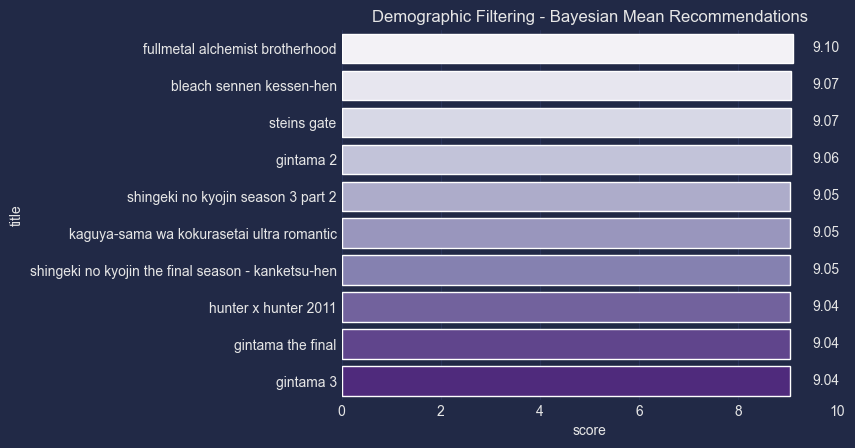

In [4]:
# ---- Top Animes: Bayesian Mean - Plot ----
plot_top_n_animes(
    bayesian_mean_top_n_animes
    , 'Demographic Filtering - Bayesian Mean Recommendations'
    , 'score'
    , 'title'
    , 10
)

<h1 id='2-popularity' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>✨ | Popularity</h1>

Now let's head to the last metric: `Popularity`. I did not talked about it earlier because this metric is used to list the animes that `Everyone's Watching`, whereas Bayesian Mean is used to list the animes `Most Liked Among the Users`.

In [5]:
# ---- Top Animes: Popularity - Table ----
popularity_top_n_animes = animes_df.copy().sort_values(by='popularity', ascending=True).head(NUMBER_OF_RECOMMENDATIONS)
popularity_top_n_animes

,title,genres,score,scored_by,popularity,image_url
id,,,,,,
16498,shingeki no kyojin,"action, suspense, award winning, drama",8.54,2660903,1,https://cdn.myanimelist.net/images/anime/10/47347.jpg
1535,death note,"suspense, supernatural",8.62,2619479,2,https://cdn.myanimelist.net/images/anime/9/9453.jpg
5114,fullmetal alchemist brotherhood,"adventure, action, fantasy, drama",9.10,2020030,3,https://cdn.myanimelist.net/images/anime/1208/94745.jpg
30276,one punch man,"action, comedy",8.50,2131099,4,https://cdn.myanimelist.net/images/anime/12/76049.jpg
11757,sword art online,"adventure, action, fantasy, romance",7.20,2072240,5,https://cdn.myanimelist.net/images/anime/11/39717.jpg
31964,boku no hero academia,action,7.89,1977824,6,https://cdn.myanimelist.net/images/anime/10/78745.jpg
38000,kimetsu no yaiba,"action, fantasy, award winning",8.50,1943121,7,https://cdn.myanimelist.net/images/anime/1286/99889.jpg
20,naruto,"adventure, action, fantasy",7.99,1883772,8,https://cdn.myanimelist.net/images/anime/13/17405.jpg
22319,tokyo ghoul,"action, fantasy, horror",7.79,1791023,9,https://cdn.myanimelist.net/images/anime/1498/134443.jpg


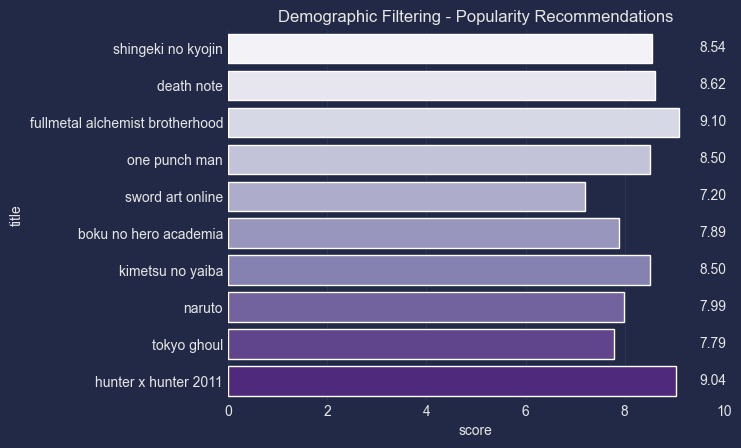

In [6]:
# ---- Top Animes: Popularity - Table ----
plot_top_n_animes(
    popularity_top_n_animes
    , 'Demographic Filtering - Popularity Recommendations'
    , 'score'
    , 'title'
    , 10
)

In the next notebook we will cover the Content Based Algorithm with Plot Descriptions, see ya!

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).